## Описание проекта

Необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.
Необходимо:

Подготовить данные;

Провести исследовательский анализ данных;

Построить и обучить модель.

### Описание данных:
    
Технологический процесс

Rougher feed — исходное сырье

Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant

Xanthate **— ксантогенат (промотер, или активатор флотации);

Sulphate — сульфат (на данном производстве сульфид натрия);

Depressant — депрессант (силикат натрия).

Rougher process (англ. «грубый процесс») — флотация

Rougher tails — отвальные хвосты

Float banks — флотационная установка

Cleaner process — очистка

Rougher Au — черновой концентрат золота

Final Au — финальный концентрат золота

Параметры этапов

air amount — объём воздуха

fluid levels — уровень жидкости

feed size — размер гранул сырья

feed rate — скорость подачи

## Подготовка данных:

Импортируем библиотеки:

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

Загружаем датафреймы:

In [209]:
import os

pth1 = 'gold_recovery_full_new.csv'
pth2 = '/datasets/gold_recovery_full_new.csv'

pth3 = 'gold_recovery_train_new.csv'
pth4 = '/datasets/gold_recovery_train_new.csv'

pth5 = 'gold_recovery_test_new.csv'
prh6 = '/datasets/gold_recovery_test_new.csv'


if os.path.exists(pth1):
    df_full= pd.read_csv(pth1)
    df_train = pd.read_csv(pth3)
    df_test = pd.read_csv(pth5)
elif os.path.exists(pth2):
    df_full = pd.read_csv(pth2)
    df_train = pd.read_csv(pth4)
    df_test = pd.read_csv(pth6)
else:
    print('Something is wrong')

Изучаем данные:

In [210]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Размер датасета df_full - (19439, 87)

In [129]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


Размер датасета df_train - (14149, 87)

In [130]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [ ]:
Размер датасета df_test - (5290, 53)

In [131]:
df_test.isnull().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [ ]:
заполняем пропуски при помощи интерполяции

In [132]:
df_test.replace(to_replace=0, value=np.nan, inplace=True)
df_test.interpolate(inplace=True)

In [208]:
print('Размер обучающей выборки {}, от общего количества данных {:.1%}'.format(
    len(df_train), len(df_train)/df_full.shape[0]))
print('Размер тестовой выборки {}, от общего количества данных {:.1%}'.format(
    len(df_test), len(df_test)/df_full.shape[0]))
print('Размер итоговой выборки {}'.format(len(df_full)))



Размер обучающей выборки 14149, от общего количества данных 72.8%
Размер тестовой выборки 5290, от общего количества данных 27.2%
Размер итоговой выборки 19439


Формула для проверки эффективности обогащения:

In [133]:
c = df_train['rougher.output.concentrate_au'] #доля золота в концентрате после флотации/очистки
f = df_train['rougher.input.feed_au'] #доля золота в сырье/концентрате до флотации/очистки
t = df_train['rougher.output.tail_au'] #доля золота в отвальных хвостах после флотации/очистки


recovery_train = (c*(f-t))/(f*(c-t))*100


Проверяем насколько эффективность обогащения рассчитана правильно для признака rougher.output.recovery:

In [134]:
mae = round(mean_absolute_error(df_train['rougher.output.recovery'], recovery_train),10)
print('MAE  = ', mae)

MAE  =  0.0


 Получили значение MAE между нашими расчетами и признаком rougher.output.recovery равеное 0.00

Выявим признаки, которые есть в обучающей выборке, но недоступные в тестовой выборке. Выведем их:

In [135]:
set_train = df_train.columns
set_test = df_test.columns

diff_set = set_train.difference(set_test)
print(diff_set)


Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

Выделяем целевые признаки

In [136]:
target  = ['rougher.output.recovery', 'final.output.recovery']

удаляем из обучающей выборки признаки которых нет в датафрейме df_test за исключением целевых признаков

In [137]:
df_train_upd = df_train.drop(set(diff_set) - set(target), axis=1)

In [138]:
df_test_upd = pd.merge(df_test.set_index('date'), df_full.set_index('date')[target], 
                       left_index=True, right_index=True).reset_index()

сравниваем, совпадает ли количество столбцов в обучающей и тестовой  выборках

In [139]:
print(len(df_train_upd.columns))
print(len(df_test_upd.columns))

55
55


Выборки совпадают по длине.

Проверяем наличие пустых ячеек в обучающей выборке

In [140]:
df_train_upd.isnull().sum()

date                                            0
final.output.recovery                           0
primary_cleaner.input.sulfate                  20
primary_cleaner.input.depressant               32
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                100
primary_cleaner.state.floatbank8_a_air          4
primary_cleaner.state.floatbank8_a_level        1
primary_cleaner.state.floatbank8_b_air          4
primary_cleaner.state.floatbank8_b_level        1
primary_cleaner.state.floatbank8_c_air          2
primary_cleaner.state.floatbank8_c_level        1
primary_cleaner.state.floatbank8_d_air          3
primary_cleaner.state.floatbank8_d_level        1
rougher.input.feed_ag                           0
rougher.input.feed_pb                         100
rougher.input.feed_rate                         8
rougher.input.feed_size                       144
rougher.input.feed_sol                         78
rougher.input.feed_au                           0


Выявили пропуски.

Проверяем есть ли пропуске в обучающей выборке

In [141]:
df_train_upd.duplicated().sum()

0

Пропусков нет

заполняем пропуски в обновленной обучающей выборке методом интерполяции

In [142]:
df_train_upd.replace(to_replace=0, value=np.nan, inplace=True)
df_train_upd.interpolate(inplace=True)


Перепроверяем:

In [143]:
df_train_upd.isnull().sum()

date                                          0
final.output.recovery                         0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate       

Пропусков нет

Проверяем наличие пропусков в тестовой выборке:

In [144]:
df_test_upd.duplicated().sum()

0

Пропусков нет

Проверяем наличие пропусков в тестовой выборке:

In [145]:
df_full.duplicated().sum()

0

Дубликатов нет

## Анализ данных

Изучаем как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Для этого напишем функцию которая рисует гистограмму

In [146]:
def material (feed, primary_cleaner, rougher, final, name):
    
    plt.figure(figsize=(14,8))
    plt.hist([feed, primary_cleaner, rougher, final], bins=100, 
             label=('Исходное сырьё', 'После первичной очистки', 'После флотации', 
                     'Итоговый концентрат'))
    
    plt.xlabel('концентрация')
    plt.ylabel('количество')
    plt.title(name)
    plt.legend()
    plt.show()
    
    

#### Серебро

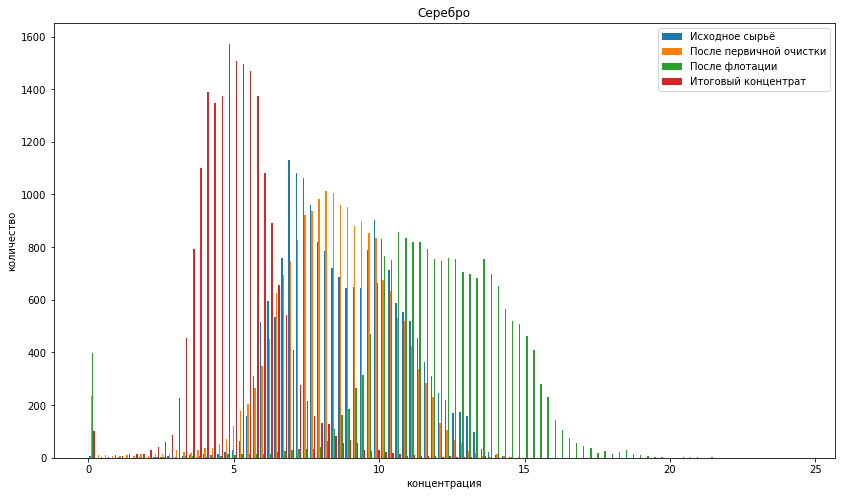

In [147]:
material(df_full['rougher.input.feed_ag'], 
         df_full['primary_cleaner.output.concentrate_ag'],
                 df_full['rougher.output.concentrate_ag'],
         df_full['final.output.concentrate_ag'],'Серебро')

На графике видно, что по мере прохождения этапов обработки  концентрация серебра уменьшается

#### Золото

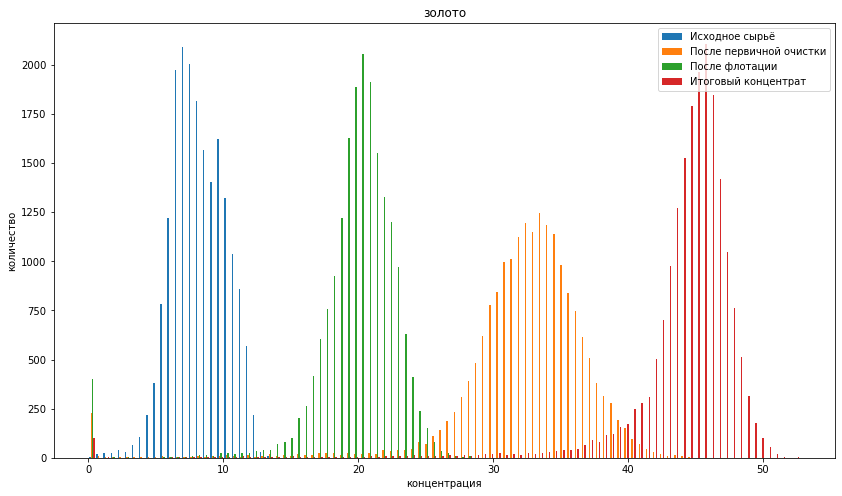

In [148]:
material(df_full['rougher.input.feed_au'], 
         df_full['primary_cleaner.output.concentrate_au'],
                 df_full['rougher.output.concentrate_au'],
         df_full['final.output.concentrate_au'],'золото')

На графике видно что помере отчистки сырья количство золота в руде практически не меняетс. только на этапе первичной очистки концентрация падает. Это может быть обусловлено технологическими особенностями очистки

#### Свинец

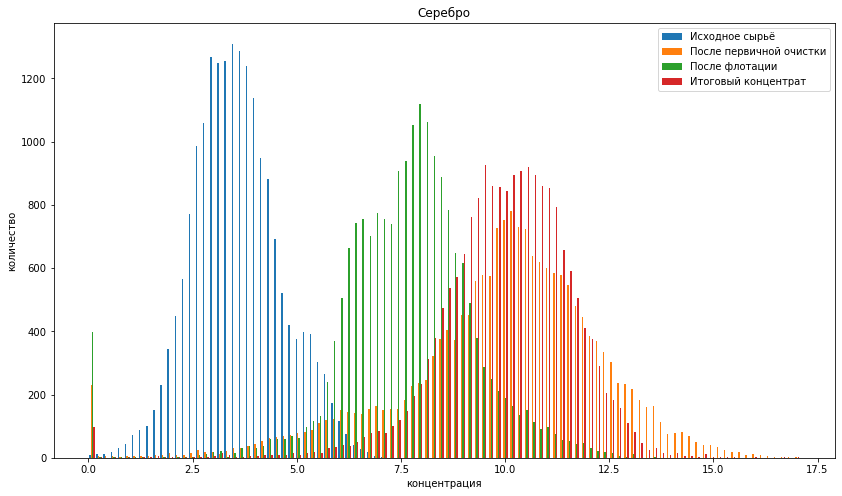

In [149]:
material(df_full['rougher.input.feed_pb'], 
         df_full['primary_cleaner.output.concentrate_pb'],
                 df_full['rougher.output.concentrate_pb'],
         df_full['final.output.concentrate_pb'],'Серебро')

На графике видно что по мере очистки золотоносного сырья концентрация свинца снижается

Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

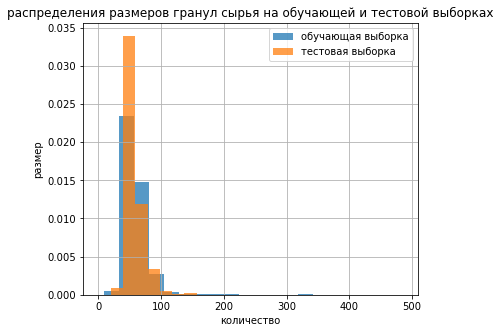

In [150]:
df_train_feed_size = df_train_upd['rougher.input.feed_size']
df_test_feed_size = df_test_upd['rougher.input.feed_size']

plt.figure(figsize=(6,5))

plt.hist(df_train_feed_size, label = 'обучающая выборка', bins=20, density=True, alpha=0.75)
plt.hist(df_test_feed_size, label = 'тестовая выборка', bins=20, density=True, alpha=0.75)
plt.xlabel('количество')
plt.ylabel('размер')
plt.title('распределения размеров гранул сырья на обучающей и тестовой выборках')
plt.legend()
plt.grid()
plt.show()


На графике видно что размеры гранул на обучающей и тестовой выборках практически равны.

In [151]:
raw_input = df_full['rougher.input.feed_ag'] + df_full['rougher.input.feed_pb'] + df_full['rougher.input.feed_sol'] + df_full['rougher.input.feed_au']
raw_output = df_full['rougher.output.concentrate_ag'] + df_full['rougher.output.concentrate_pb'] + df_full['rougher.output.concentrate_sol'] + df_full['rougher.output.concentrate_au']
final_output = df_full['final.output.concentrate_ag'] + df_full['final.output.concentrate_pb'] + df_full['final.output.concentrate_sol'] + df_full['final.output.concentrate_au']

 

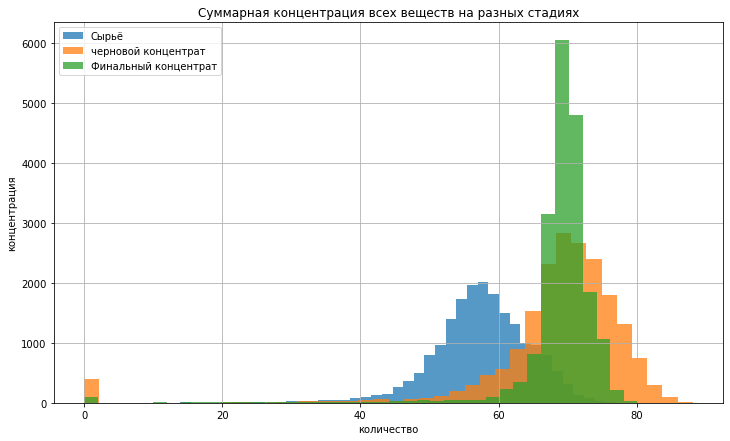

In [152]:
plt.figure(figsize=(12,7))

plt.hist(raw_input, label = 'Сырьё', bins=50,  alpha=0.75)
plt.hist(raw_output, label = 'черновой концентрат', bins=40,  alpha=0.75)
plt.hist(final_output, label = 'Финальный концентрат', bins=40,  alpha=0.75)
plt.xlabel('количество')
plt.ylabel('концентрация')
plt.title('Суммарная концентрация всех веществ на разных стадиях')
plt.legend()
plt.grid()
plt.show()

На графике видно что на каждом этапе очистки сырья концентрация металлов  увеличивается

## Построение модели

Напишем функции для расчета показателей SMAPE и итогового SMAPE

In [153]:
def find_smape(target, prediction):
    mape = (np.abs(target - prediction)) / (np.abs(target) + np.abs(prediction)/2)
    sum_mape = mape.sum()
    final_smape = (1 / len(target)) * sum_mape * 100
    return final_smape

In [154]:
def final_smape(rougher, final):
    
    final = 0.25 * rougher + 0.75 * final
    
    return final

#### Обучаем модели и оцениваем их качество кросс-валидацией. Выбераем лучшую модель и проверяем её на тестовой выборке. 

Разабьем обучающую и тестовую выборки на rougher и final

In [155]:
features_train_rougher = df_train_upd.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_rougher = df_train_upd['rougher.output.recovery']

features_test_roughter = df_test_upd.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_rougher = df_test_upd['rougher.output.recovery']

features_train_final = df_train_upd.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_final = df_train_upd['final.output.recovery']

features_test_final = df_test_upd.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_final = df_test_upd['final.output.recovery']

Маштабируем признаки при помощи StandardScaler

In [172]:
scaler = StandardScaler()
scaler.fit(features_train_rougher)
features_train_rougher=scaler.transform(features_train_rougher)
features_test_rougher=scaler.transform(features_test_roughter)

In [157]:
scaler = StandardScaler()
scaler.fit(features_train_final)
features_train_final = scaler.transform(features_train_final)
features_test_final=scaler.transform(features_test_final)

Строим модели

В качестве метрики мы должны использовать метрику sMAPE, укажем эту функцию в качетве параметра scoring, использовав объект scorer

In [ ]:
cv = 5
scorer = make_scorer(find_smape)

Модель Дерево Решений

In [40]:
def tree_decision(features, target):
    best_depth = 0
    best_score = 0
    for depth in range(1, 20):
        model = DecisionTreeRegressor(random_state=12345, max_depth=depth) 
        score = cross_val_score(model, features, target, cv=cv, scoring=scorer).mean()
        if score > best_score:
            best_depth = depth
            best_score = score
            
    return best_depth, best_score       






In [58]:
result_rougher = tree_decision(features_train_rougher, target_train_rougher)

In [61]:
print('Средние знаение Smape модели Дерева Решени на этапе rougher равен {:.2},  с глубиной дерева {}'.format(result_rougher[1], result_rougher[0]))

Средние знаение Smape модели Дерева Решени на этапе rougher равен 6.3,  с глубиной дерева 13


In [62]:
result_final = tree_decision(features_train_final, target_train_final)

In [68]:
print('Средние знаение  Smape модели Дерева Решени на этапе final равен {:.3} , с глубиной дерева {}'.format(result_final[1], result_final[0]))

Средние знаение  Smape модели Дерева Решени на этапе final равен 11.5 , с глубиной дерева 18


Модель линейной регрессии

In [55]:
def regression(features, target):

    model = LinearRegression()
    score = cross_val_score(model, features, target, cv=cv, scoring=scorer).mean()
    return(score)

In [70]:
print('Значение значение Smape модели Регрессии на этапе rougher равен {:.2}'.format(regression(features_train_rougher, target_train_rougher)))

Значение значение Smape модели Регрессии на этапе rougher равен 4.9


In [72]:
print('Значение  финальной Smape модели Регрессии на этапе final равен {:.2}'.format(regression(features_train_final, target_train_final)))

Значение  финальной Smape модели Регрессии на этапе final равен 7.5


Модель случайный лес

In [48]:
def random_forest(features, target):
    
    best_score = 0
    best_estimators = 0
    best_depth = 0
    
    for estimators in range(1,41,10):
        for depth in range(1, 15):
            model = RandomForestRegressor(random_state=12345, n_estimators=estimators,  max_depth=depth)
            score = cross_val_score(model, features, target, cv=cv, scoring=scorer).mean()
            if score > best_score:
                best_score = score
                best_estimators = estimators
                best_depth = depth 
            
    return  best_score, best_estimators, best_depth     

In [49]:
random_forest_result = random_forest(features_train_rougher, target_train_rougher)

In [52]:
print('Значение Smape модели Случайный лес на этапе rougher равен {:.2}, с глубиной дерева {} и количеством деревьев {}'.format(random_forest_result[0],
                                                                                                                                random_forest_result[1], random_forest_result[2]))

Значение Smape модели Случайный лес на этапе rougher равен 7.8, с глубиной дерева 1 и количеством деревьев 14


In [53]:
random_forest_result_final = random_forest(features_train_final, target_train_final)

In [54]:
print('Значение Smape модели Случайный лес на этапе finalравен {:.2}, с глубиной дерева {} и количеством деревьев {}'.format(random_forest_result_final[0], 
                                                                                                                             random_forest_result_final[1], random_forest_result_final[2]))

Значение Smape модели Случайный лес на этапе finalравен 8.5, с глубиной дерева 1 и количеством деревьев 13


#### Вывод

Получили следующие результаты:

Средние знаение <b>Smape</b> модели Дерева Решени на этапе rougher равен 6.3, с глубиной дерева 13

Средние знаение  <b>Smape</b> модели Дерева Решени на этапе final равен 11.5 , с глубиной дерева 18



Средние значение  <b>Smape</b> модели Регрессии на этапе rougher равен 4.9

Средние значение <b>Smape</b> модели Регрессии на этапе final равен 7.5


Средние значение <b>Smape</b> модели Случайный лес на этапе rougher равен 7.8, с глубиной дерева 1 и количеством деревьев 14

Средние значение <b>Smape</b> модели Случайный лес на этапе final равен 8.5, с глубиной дерева 1 и количеством деревьев 13

Лучше всего показала себя модель Линейная Регрессия. 

#### Прверка предсказаний на тестовой выборке

In [173]:
test_set_rougher = LinearRegression()
test_set_final = LinearRegression()

test_set_rougher.fit(features_train_rougher, target_train_rougher) 
predictions_test_set_rougher = test_set_rougher.predict(features_test_rougher) 

test_set_rougher_mape_score = find_smape(target_test_rougher, predictions_test_set_rougher)



In [165]:
test_set_final = LinearRegression()

test_set_final.fit(features_train_final, target_train_final) 
predictions_test_set_final = test_set_final.predict(features_test_final) 

test_set_final_mape_score = find_smape(target_test_final, predictions_test_set_final)


In [166]:
final_smape_score = final_smape(test_set_rougher_mape_score, test_set_final_mape_score)

In [169]:
print('Знатение SMAPE на этапе флотации равен {:.2}'.format(test_set_rougher_mape_score))
print('Знатение SMAPE на конечном этапе очистки равен {:.2}'.format(test_set_final_mape_score))
print('Итоговое знатение SMAPE  равено {:.2}'.format(final_smape_score))

Знатение SMAPE на этапе флотации равен 6.9
Знатение SMAPE на конечном этапе очистки равен 7.2
Итоговое знатение SMAPE  равено 7.1


#### Проверка модели на адекватность

Проверяем модель случайного леса на адекватность с помощью DummyRegressor

In [202]:
dummy = DummyRegressor().fit(features_train_rougher, target_train_rougher)
dummy_pred_rougher = dummy.predict(features_test_rougher)


In [203]:
dummy = DummyRegressor().fit(features_train_final, target_train_final)
dummy_pred_final = dummy.predict(features_test_final)

In [204]:
check_rougher = find_smape(target_test_rougher, dummy_pred_rougher)
check_final = find_smape(target_test_final, dummy_pred_final)
final_result = final_smape(check_rougher, check_final)

In [205]:
print('Знатение SMAPE на этапе флотации при проверке модели на адекватность равено {:.3}'.format(check_rougher))
print('Знатение SMAPE на конечном этапе очистки при проверке модели на адекватность равено {:.3}'.format(check_final))
print('Итоговое знатение SMAPE  равено {:.3}'.format(final_result))

Знатение SMAPE на этапе флотации при проверке модели на адекватность равено 7.3
Знатение SMAPE на конечном этапе очистки при проверке модели на адекватность равено 7.28
Итоговое знатение SMAPE  равено 7.28


#### Вывод

Проверили модель Линейно регрессии на тестовой выборке и получили следующие результаты:
    
    Знатение SMAPE на этапе флотации равен 6.9
    
    Знатение SMAPE на конечном этапе очистки равен 7.2
    
    Итоговое знатение SMAPE  равено 7.1
    
Проверили модель на адекватость и получили следующие результаты:

    Знатение SMAPE на этапе флотации при проверке модели на адекватность равено 7.3
    
    Знатение SMAPE на конечном этапе очистки при проверке модели на адекватность равено 7.28
    
    Итоговое знатение SMAPE  равено 7.28
    
Как видно значения отличаются не оень сильно, то говорит что наша модель хорошо предсказывает результаты.



## Итоговый вывод

Нам необходимо было подготовить прототип модели машинного обучения для «Цифры». 

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками. 

Изучив предоставленные датафреймы видим:

     Размер обучающей выборки 14149, от общего количества данных 72.8%
     Размер тестовой выборки 5290, от общего количества данных 27.2%
     Размер итоговой выборки 19439
     
     
Формула для проверки эффективности обогащения:

    c = доля золота в концентрате после флотации/очистки
    f = доля золота в сырье/концентрате до флотации/очистки
    t = доля золота в отвальных хвостах после флотации/очистки

recovery_train = (c*(f-t))/(f*(c-t))*100

Проверили насколько эффективность обогащения рассчитана правильно для признака rougher.output.recovery. Получили значение MAE между нашими расчетами и признаком rougher.output.recovery равеное 0.00  

Выявили признаки, которые есть в обучающей выборке, но недоступные в тестовой выборке и выявили целевые признаки.

Удалили из обучающей выборки признаки которых нет в датафрейме df_test за исключением целевых признаков

сравнили, совпадает ли количество столбцов в обучающей и тестовой выборках. получиось - 55. Выборки совпадают по длине.

Проверили наличие пустых ячеек в обучающей выборке. Выявили пропуски.

Проверили есть ли пропуске в обучающей выборке. Пропусков нет

Заполнили пропуски в обновленных  обучающей и тестовой выборках методом интерполяции.

Изучили как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Для этого написали функцию которая рисует гистограмму:

       1) по мере прохождения этапов обработки концентрация серебра уменьшается

       2) помере отчистки сырья количство золота в руде практически не меняется, только на этапе первичной очистки концентрация падает. Это может быть обусловлено технологическими особенностями очистки

       3)  видно что по мере очистки золотоносного сырья концентрация свинца снижается

Размеры гранул на обучающей и тестовой выборках практически равны.


На этапе построения модели написали функции для расчета показателей SMAPE и итогового SMAPE

Разбили обучающую и тестовую выборки на rougher и final

Отмаштабировали признаки при помощи StandardScaler


На этапе построения моделей в качестве метрики мы должны использовать метрику sMAPE, укажем эту функцию в качетве параметра scoring, использовав объект scorer

cv = 5 scorer = make_scorer(find_smape)

Поучили следующие результаты:

    Средние знаение Smape модели Дерева Решени на этапе rougher равен 6.3,  с глубиной дерева 13
    Средние знаение  Smape модели Дерева Решени на этапе final равен 11.5 , с глубиной дерева 18


    Значение значение Smape модели Регрессии на этапе rougher равен 4.9
    Значение  финальной Smape модели Регрессии на этапе final равен 7.5


    Значение Smape модели Случайный лес на этапе rougher равен 7.8, с глубиной дерева 1 и количеством деревьев 14
    Значение Smape модели Случайный лес на этапе finalравен 8.5, с глубиной дерева 1 и количеством деревьев 13


Лучше всего показала себя модель Линейная Регрессия.

Проверили предсказания на тестовой выборке:

Знатение SMAPE на этапе флотации равен 6.9
Знатение SMAPE на конечном этапе очистки равен 7.2
Итоговое знатение SMAPE  равено 7.1

Проверили модель Линейной Регрессии на адекватность с помощью DummyRegressor.

     Знатение SMAPE на этапе флотации при проверке модели на адекватность равено 7.3
     Знатение SMAPE на конечном этапе очистки при проверке модели на адекватность равено 7.28
     Итоговое знатение SMAPE  равено 7.28


Как видно значения отличаются не очень сильно, то говорит что наша модель хорошо предсказывает результаты. Соответственно выбор модели Линейной Регрессии можно считать оправданным
